# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [54]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

# 1) Negative Transformation

In [56]:
def negativeTransformation(img):
    img = rgb2gray(img) * 255
    out_img = 255 - img
    show_images([img, out_img], ['Input Image', 'Output Image'])

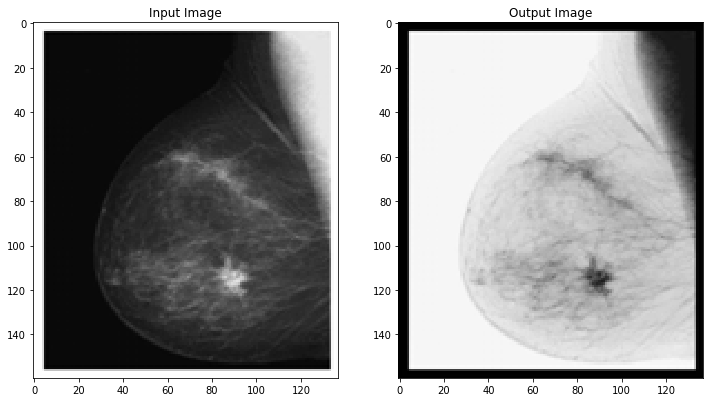

In [57]:
img = io.imread('imgs/Picture1.png')
negativeTransformation(img)

# 2) Contrast Enhancement

In [58]:
def contrastEnhancement(img):
    img = rgb2gray(img) * 255
    out_img = np.copy(img)
    out_img = np.where(img<=100,1.5*img+50,img)
    show_images([img, out_img], ['Input Image', 'Output Image'])

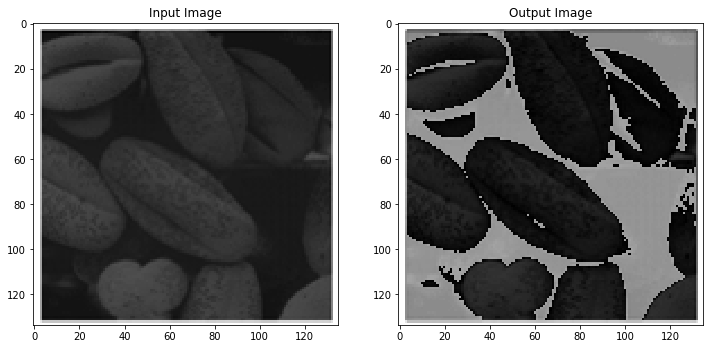

In [59]:
img = io.imread('imgs/Picture2.png')
contrastEnhancement(img)

# 3) Gamma Correction

In [60]:
def gammaCorrection(img, c, alpha):
    img = rgb2gray(img)
    out_img = c * np.power(img, alpha)
    show_images([img, out_img], ['Input Image', 'Output Image'])

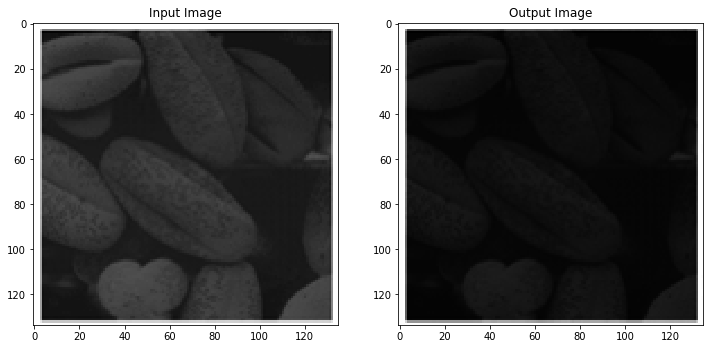

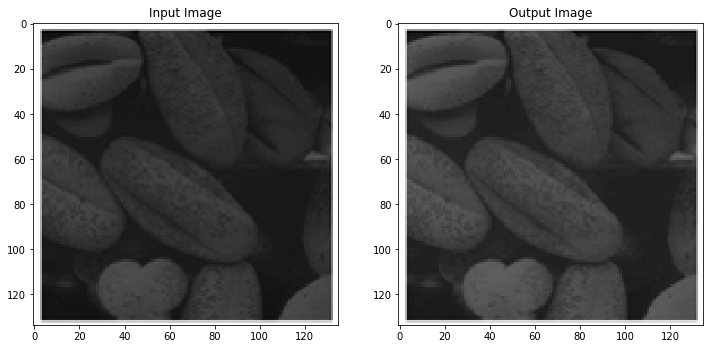

In [61]:
img = io.imread('imgs/Picture2.png')
gammaCorrection(img, 1, 3)
gammaCorrection(img, 1, 0.5)

### As alpha increases the brightness decreases and vice versa.

# 4) Histogram Eq.

#### Note: Histogram function of skimage returns only present intensity values not all 255
#### You can use showHist function from commonfunctions file

In [62]:
def getImageWithHist(img):
    img = rgb2gray(img) * 255
    # maximum number of gray levels
    max_gray = int(np.max(img))
    # generating 1D array of size equal to max gray levels 
    freq = np.zeros((1,max_gray+1))[0]
    # np.arange makes array of max_gray -1 and we need bins to be max_gray +1 so we add 2
    freq = np.histogram(img,bins = np.arange(max_gray+2))[0]
    # calculating probability of pixel intensities
    img_size = img.shape[0] * img.shape[1]
    
    cumu_hist = freq/(img_size)
    cumu_hist = np.cumsum(cumu_hist)
    cumu_hist *= (max_gray)
    cumu_hist = np.around(cumu_hist).astype(int)
    
    out_img = np.zeros(img.shape)
    out_img = cumu_hist[np.copy(img).astype(int)]
    
    #rendering i/o image
    show_images([img, out_img], ['Input Image', 'Output Image'])
    # before applying histogram equalizer
    showHist(img)
    # after applying histogram equalizer
    showHist(out_img)

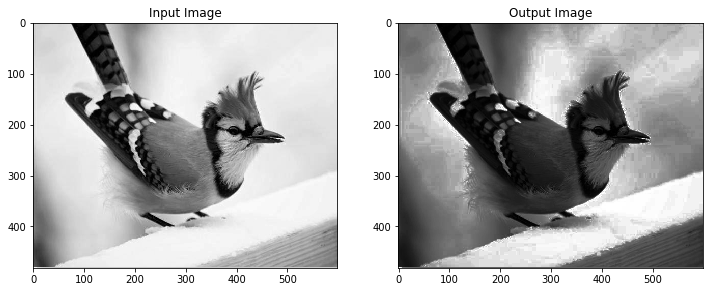

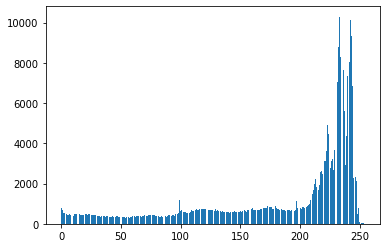

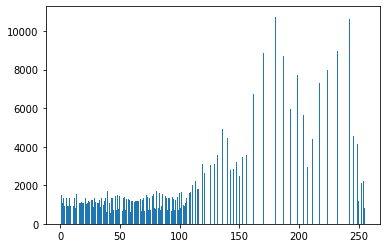

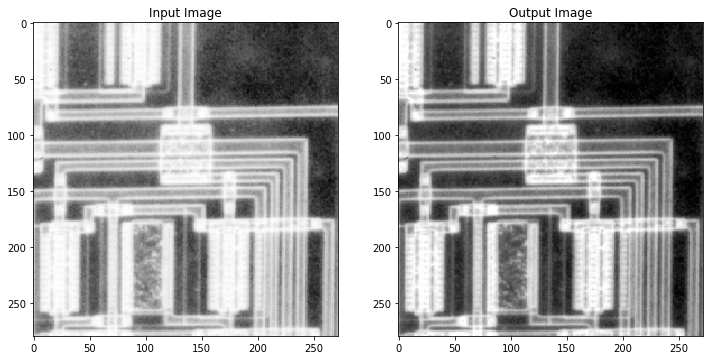

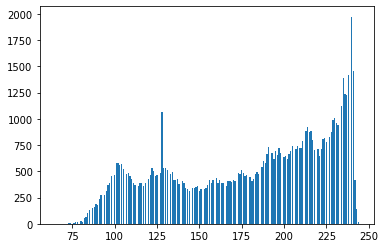

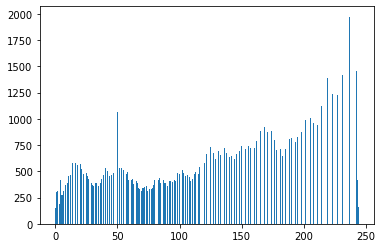

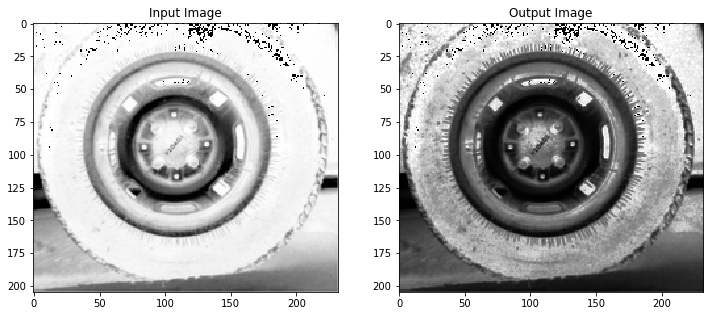

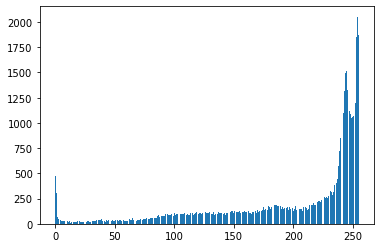

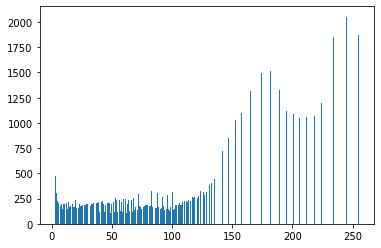

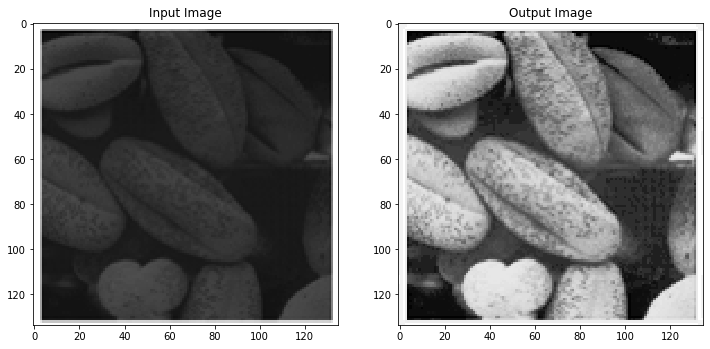

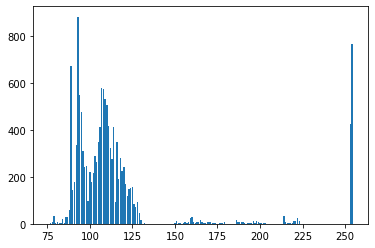

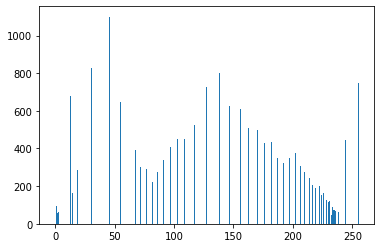

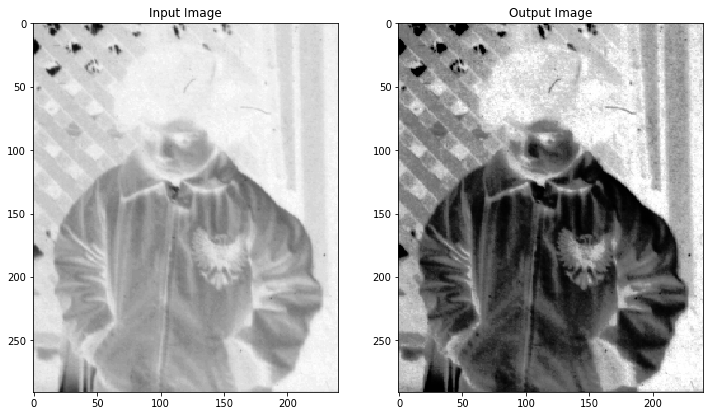

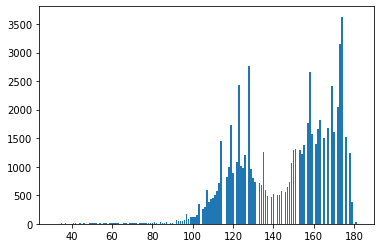

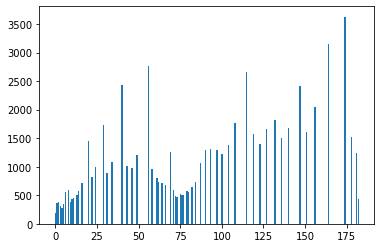

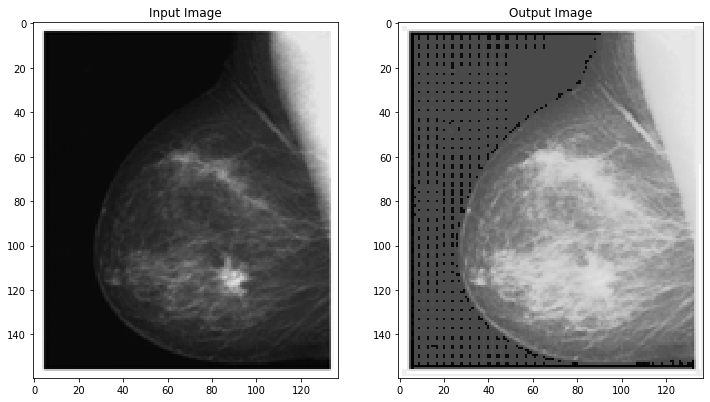

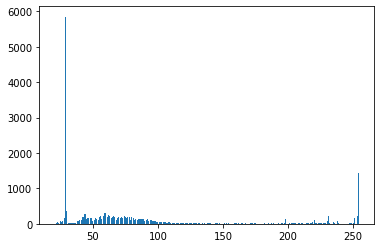

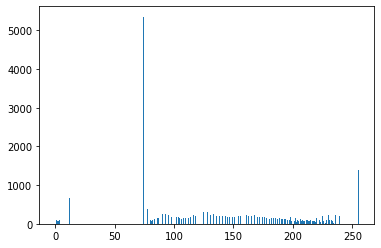

In [63]:
import os

image_names = os.listdir('./imgs')
for image_name in image_names:
    path = os.path.join('imgs',image_name)
    img = io.imread(path)
    getImageWithHist(img)

# BONUS

### Make image less bluish

In [64]:
def getImageWithHistBluish(img):
    # maximum number of gray levels
    max_gray = int(np.max(img[:,:,2]))
    # generating 1D array of size equal to max gray levels 
    freq = np.zeros((1,max_gray+1))[0]
    # np.arange makes array of max_gray -1 and we need bins to be max_gray +1 so we add 2
    freq = np.histogram(img[:,:,2],bins = np.arange(max_gray+2))[0]
    # calculating probability of pixel intensities
    img_size = img[:,:,2].shape[0] * img[:,:,2].shape[1]
    
    cumu_hist = freq/(img_size)
    cumu_hist = np.cumsum(cumu_hist)
    cumu_hist *= (max_gray)
    cumu_hist = np.around(cumu_hist).astype(int)
    
    out_img = np.copy(img)
    out_img[:,:,2] = cumu_hist[np.copy(img[:,:,2]).astype(int)]
    
    #rendering i/o image
    show_images([img, out_img], ['Input Image', 'Output Image'])
    # before applying histogram equalizer
    showHist(img[:,:,2])
    # after applying histogram equalizer
    showHist(out_img[:,:,2])

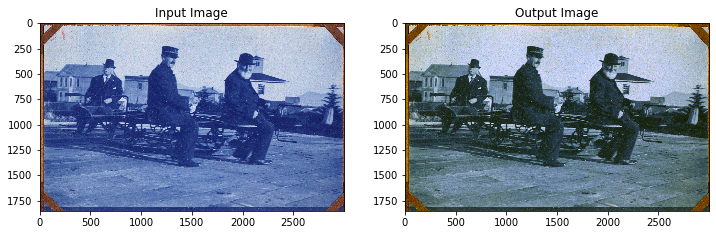

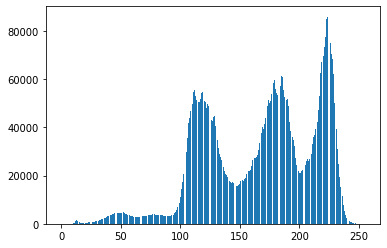

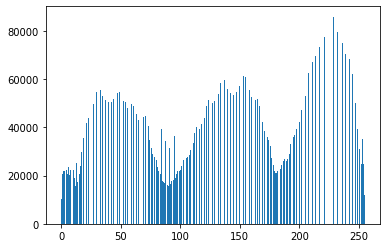

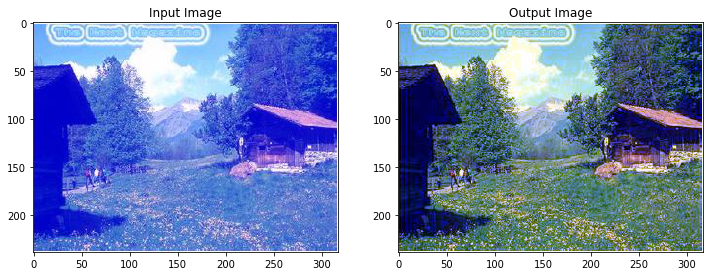

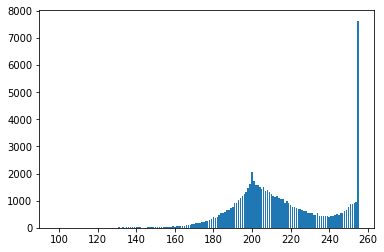

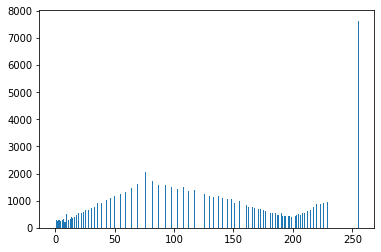

In [65]:
img = io.imread('1.jpg')
getImageWithHistBluish(img)
img = io.imread('2.jpg')
getImageWithHistBluish(img)